<a href="https://colab.research.google.com/github/Teena1302/Majorproject/blob/main/Navigating_Comment_Toxicity_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Data Loading

In [129]:

import pandas as pd
import tensorflow as tf
import numpy as np

In [130]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [131]:
df = pd.read_csv('train.csv')
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [132]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [133]:
df[df['insult']==1].head

<bound method NDFrame.head of                    id                                       comment_text  \
6    0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
42   001810bf8c45bf5f  You are gay or antisemmitian?\n\nArchangel WHi...   
43   00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
55   0020e7119b96eeeb  Stupid peace of shit stop deleting my stuff as...   
56   0020fd96ed3b8c8b  =Tony Sidaway is obviously a fistfuckee. He lo...   
65   0028d62e8a5629aa  All of my edits are good.  Cunts like you who ...   
86   0036621e4c7e10b5  Would you both shut up, you don't run wikipedi...   
105  00472b8e2d38d1ea         A pair of jew-hating weiner nazi schmucks.   
168  00686325bcc16080  You should be fired, you're a moronic wimp who...   
176  006b94add72ed61c  I think that your a Fagget get a oife and burn...   
179  006d11791d76b9f3  REPLY ABOVE:\nThat was me, loser. The UN defin...   
181  006e87872c8b370c  you are a stupid fuck\n\nand your mother's cun...   
211  0086998b34865f93              Fuck you, block me, you faggot pussy!   
218  008e0818dde894fb  Kill all niggers.\n\nI have hard, that others ...   
231  009371b0ef213487  Burn Deck\n\nIf that'd guy's burn deck is like...   
238  0097dd5c29bf7a15  u r a tw@ fuck off u gay boy.U r smelly.Fuck u...   

     toxic  severe_toxic  obscene  threat  insult  identity_hate  
6        1             1        1       0       1              0  
42       1             0        1       0       1              1  
43       1             0        1       0       1              0  
55       1             1        1       0       1              0  
56       1             0        1       0       1              0  
65       1             0        1       0       1              0  
86       1             0        0       0       1              0  
105      1             0        1       0       1              1  
168      1             0        0       0       1              0  
176      1             0        1       1       1              1  
179      0             0        0       0       1              0  
181      1             1        1       0       1              0  
211      1             0        1       0       1              0  
218      1             0        1       0       1              1  
231      1             0        1       0       1              0  
238      1             0        1       0       1              1  >

Preprocess

In [134]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.6.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.6
ale-py                                0.11.0
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.0.2
astropy-iers-data                     0.2025.5.12.0.

In [135]:
from tensorflow.keras.layers import TextVectorization

In [136]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [137]:
MAX_FEATURES = 200000 # number of words in the vocab

In [138]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [139]:
vectorizer.adapt(X.values)

In [140]:
vectorized_text = vectorizer(X.values)

In [141]:
len(X)

282

In [142]:
vectorized_text

<tf.Tensor: shape=(282, 1800), dtype=int64, numpy=
array([[ 428,   76,    2, ...,    0,    0,    0],
       [4073,   60, 1266, ...,    0,    0,    0],
       [ 518,  234,   66, ...,    0,    0,    0],
       ...,
       [   7,   51,  284, ...,    0,    0,    0],
       [ 198,    4,  288, ...,    0,    0,    0],
       [ 247,  154, 4658, ...,    0,    0,    0]])>

In [143]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [144]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [145]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [146]:
train_generator = train.as_numpy_iterator()

In [147]:
train_generator.next()

(array([[ 370,   54,   19, ...,    0,    0,    0],
        [ 220,    2,  726, ...,    0,    0,    0],
        [ 428,   76,    2, ...,    0,    0,    0],
        ...,
        [4206,  112,    8, ...,    0,    0,    0],
        [4538, 3239,   15, ...,    0,    0,    0],
        [  43,    7,  162, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

Sequential Model

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [149]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [150]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [151]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [152]:
history = model.fit(train, epochs=1, validation_data=val)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.6416 - val_loss: 0.3110


In [153]:
history.history

{'loss': [0.571011483669281], 'val_loss': [0.31095561385154724]}

In [154]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

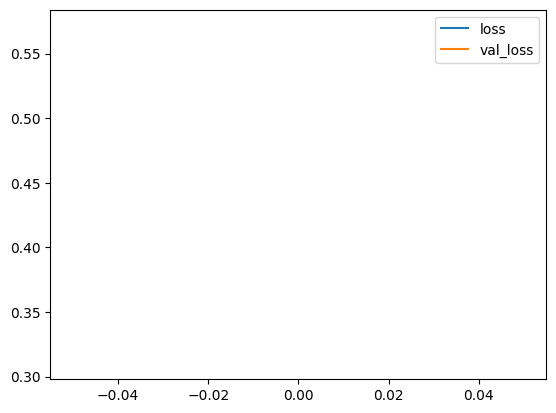

In [155]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

Make Predictions

In [156]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [157]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [158]:
batch = test.as_numpy_iterator().next()

In [159]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [160]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [161]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


In [162]:
res.shape

(1, 6)

In [163]:
(res > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0]])

Evaluate Model

In [164]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [165]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [166]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [167]:
print(f'Accuracy: {pre.result().numpy()}, Recall:{re.result().numpy()}')

Accuracy: 0.0, Recall:0.0


Testing

In [168]:
df.columns[2:8]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [169]:
input_str = vectorizer('Nobody likes you, you should die. Nobody gives a damn!')

In [170]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [171]:
res

array([[0.21871603, 0.14084022, 0.27812928, 0.12920415, 0.29090405,
        0.09495206]], dtype=float32)

Gradio

In [172]:
!pip install gradio jinja2

In [173]:
import tensorflow as tf
import gradio as gr

In [174]:
!pip install gradio-blocks

ERROR: Could not find a version that satisfies the requirement gradio-blocks (from versions: none)
ERROR: No matching distribution found for gradio-blocks


In [175]:
model.save('toxicity.h5')

In [176]:
model = tf.keras.models.load_model('toxicity.h5')

In [177]:
input_str = vectorizer('hey i freaken hate you!')

In [178]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


In [179]:
res

array([[0.21241452, 0.13395704, 0.27150452, 0.12118856, 0.28281912,
        0.08809946]], dtype=float32)

In [180]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [181]:

import gradio as gr

interface = gr.Interface(fn=score_comment,
                        inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [182]:
import gradio as gr
from transformers import pipeline

classifier = pipeline("text-classification",
                      model="unitary/toxic-bert",
                      top_k=None,
                      truncation=True)


LABELS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

def score_comment(comment):
    results = classifier(comment)[0]

    output = ""
    for item in results:
        label = item['label'].lower()
        score = item['score']
        if label in LABELS:
            output += f"{label}: {score > 0.5}\n"

    return output


interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=3, placeholder="Type a comment..."),
    outputs="text",
    title="Toxic Comment Classifier",
    description="Classifies comments as toxic, obscene, threat, insult, etc."
)

interface.launch(share=True)


Device set to use cuda:0


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7a25b9897a4f63b4a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
